In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
import numpy as np
iris = load_iris()

In [262]:
X_original = iris.data
Y = iris.target
features = iris.feature_names

sel_f = [0,1]
X = X_original[:,sel_f]

Text(0.5, 1.0, 'Scatter plot on Iris dataset')

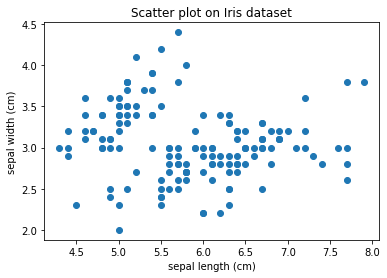

In [263]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
plt.title('Scatter plot on Iris dataset')

Text(0.5, 1.0, 'Scatter plot on Iris dataset')

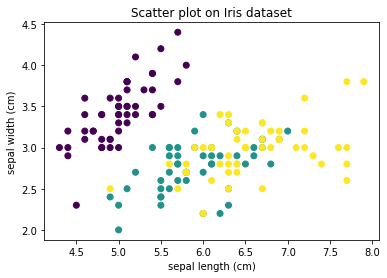

In [264]:
plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
plt.title('Scatter plot on Iris dataset')

In [265]:
rep_models = {}
class_models = {}
X_C = {}
for c in [0,1,2]:
    X_c = X[np.where(Y==c)[0],:] 
    X_C[c] = X_c
    rep_model = NearestNeighbors(n_neighbors=1, algorithm='ball_tree', metric='euclidean')
    rep_model.fit(X_c)
    rep_models[c] = rep_model
    
    class_model = NearestNeighbors(n_neighbors=50, algorithm='ball_tree', metric='euclidean')
    class_model.fit(X_c)
    class_models[c] = class_model

In [266]:
overall_model =  NearestNeighbors(n_neighbors=30, algorithm='ball_tree', metric='euclidean')
overall_model.fit(X)

NearestNeighbors(algorithm='ball_tree', metric='euclidean', n_neighbors=30)

In [267]:
ind = 80
x = X[ind,:]
y = Y[ind]

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  
/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


Text(0, 0.5, 'sepal width (cm)')

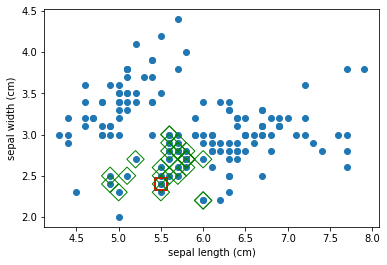

In [268]:
# instance-centered sampling
distances, indices = overall_model.kneighbors(x.reshape(1, -1))
N_x = X[indices[0][1:],:]
# highlighting x
plt.scatter(X[:,0],X[:,1])
plt.scatter(x[0], x[1], c='',edgecolor='red', alpha=1.0, linewidth=2, marker='s', s=150)
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='green', alpha=1.0, linewidth=1, marker='D', s=150)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  
/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


Text(0, 0.5, 'sepal width (cm)')

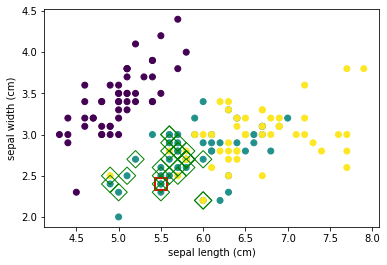

In [269]:
# instance-centered sampling
distances, indices = overall_model.kneighbors(x.reshape(1, -1))
N_x = X[indices[0][1:],:]
# highlighting x
plt.scatter(X[:,0],X[:,1], c=Y)
plt.scatter(x[0], x[1], c='',edgecolor='red', alpha=1.0, linewidth=2, marker='s', s=150)
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='green', alpha=1.0, linewidth=1, marker='D', s=150)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


Text(0, 0.5, 'sepal width (cm)')

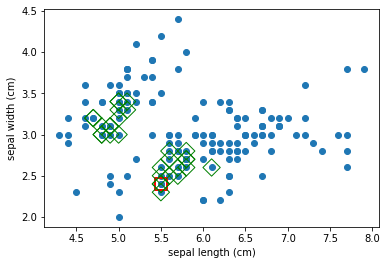

In [270]:
# multi-centerd sampling
x_hat = {}
for c in [0,1,2]:
    if c == y:
        x_hat[c] = x
    else:
        distances, indices = rep_models[c].kneighbors(x.reshape(1, -1))
        x_hat[c] = X_C[c][indices[0][0]].copy()
dist = []
data = []
for c in [0,1,2]:
    distances, indices = class_models[c].kneighbors(x_hat[c].reshape(1, -1))
    dist.append(distances[0])
    data.append(X_C[c][indices])
dist = np.hstack(dist)
data = np.hstack(data)
data = data[0]

sorted_indices = np.argsort(dist)
selected_indices = sorted_indices[:30]
N_x = data[selected_indices, :]

# highlighting x
plt.scatter(X[:,0],X[:,1])
plt.scatter(x[0], x[1], c='',edgecolor='red', alpha=1.0, linewidth=2, marker='s', s=150)
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='green', alpha=1.0, linewidth=1, marker='D', s=150)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


Text(0, 0.5, 'sepal width (cm)')

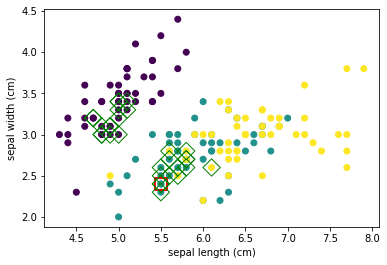

In [271]:
# multi-centerd sampling
x_hat = {}
for c in [0,1,2]:
    if c == y:
        x_hat[c] = x
    else:
        distances, indices = rep_models[c].kneighbors(x.reshape(1, -1))
        x_hat[c] = X_C[c][indices[0][0]].copy()
dist = []
data = []
for c in [0,1,2]:
    distances, indices = class_models[c].kneighbors(x_hat[c].reshape(1, -1))
    dist.append(distances[0])
    data.append(X_C[c][indices])
dist = np.hstack(dist)
data = np.hstack(data)
data = data[0]

sorted_indices = np.argsort(dist)
selected_indices = sorted_indices[:30]
N_x = data[selected_indices, :]

# highlighting x
plt.scatter(X[:,0],X[:,1], c=Y)
plt.scatter(x[0], x[1], c='',edgecolor='red', alpha=1.0, linewidth=2, marker='s', s=150)
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='green', alpha=1.0, linewidth=1, marker='D', s=150)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])